# Lyft Bay Wheels Data Exploration
## by Claire Li

## Investigation Overview

This project uses trip data from Lyft's Bay Wheels, a bikeshare service based in San Francisco, CA. The goal of this project is to glean insights about the service from the dataset using data visualizations. Specifically, I investigated peak hours, ride details, and rider information. 

## Dataset Overview

The dataset (taken from [Lyft's website](https://www.lyft.com/bikes/bay-wheels/system-data)) included all Bay Wheels rides made in May 2020. Features included in the dataset were: ride ID, type of bike, start and end time/date, start and end station ID, start and end station name, start and end station coordinates, and user type.   



In [7]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import folium 
from geopy import distance

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [5]:
# load in the dataset into a pandas dataframe
baywheels = pd.read_csv('baywheels-tripdata.csv')
baywheels.head()

FileNotFoundError: [Errno 2] File baywheels-tripdata.csv does not exist: 'baywheels-tripdata.csv'

In [6]:
#Convert started_at and ended_at columns to datetime 
baywheels['started_at'] = pd.to_datetime(baywheels['started_at'])
baywheels['ended_at'] = pd.to_datetime(baywheels['ended_at'])

NameError: name 'baywheels' is not defined

In [ ]:
#Create columns for date of month, day of week, and time of day
baywheels['start_day'] = baywheels['started_at'].dt.day

baywheels['day_of_week'] = baywheels['started_at'].dt.weekday
baywheels['day_of_week'].replace({0: 'Mon', 1: 'Tues', 2: 'Wed', 3: 'Thurs', 4: 'Fri', 5: 'Sat', 6: 'Sun'}, inplace = True)
days = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
day_type = pd.api.types.CategoricalDtype(ordered = True, categories = days)
baywheels['day_of_week'] = baywheels['day_of_week'].astype(day_type)

baywheels['time_of_day'] = baywheels['started_at'].dt.hour

## (Visualization 1)

> Write a comment about your visualization here. The visualization should be in
the next cell, as a sub-slide type. Make sure your visualizations are polished!

NameError: name 'baywheels' is not defined

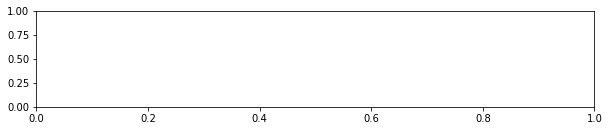

In [3]:
plt.figure(figsize = [10, 6]);

#Scatterplot for time of month 
plt.subplot(3, 1, 1);
temp = baywheels.copy().groupby('start_day').count().reset_index()
plt.plot(temp["start_day"], temp["ride_id"], marker = 'o'); 
dates = np.arange(1, 32, 1)
plt.xticks(dates);
plt.xlabel("Day of the Month");
plt.ylabel("Number of Rides");
plt.title("Bay Wheels Rides in May 2020");

#Scatterplot for day of week 
plt.subplot(3, 1, 2);
temp = baywheels.copy().groupby('day_of_week').count().reset_index()
plt.plot(temp["day_of_week"], temp["ride_id"], marker = 'o'); 
plt.xlabel("Day of the Week");
plt.ylabel("Number of Rides");
plt.title("Bay Wheels Rides in May 2020");

#Scatterplot for time of day 
plt.subplot(3, 1, 3);
temp = baywheels.copy().groupby('time_of_day').count().reset_index()
plt.plot(temp["time_of_day"], temp["ride_id"], marker = 'o'); 
plt.xlabel("Time of Day");
plt.ylabel("Number of Rides");
plt.xticks([0,4,8, 12, 16, 20, 24],["12AM", "4AM","8AM","12PM","4PM", "8PM", "12AM"]);
plt.title("Bay Wheels Rides in May 2020");

## (Visualization 2)

> You should have at least three visualizations in your presentation,
but feel free to add more if you'd like!

## (Visualization 3)



> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!